Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**Assignment 5.2: Build and Apply Multilayer Perceptron**
**Name** | Catorce, Mayah Mae A.
**Section** | CPE32S3
**Date Performed**: |March 20, 2024
**Date Submitted**: |March 26, 2024
**Instructor**: | Engr. Roman Richard

<hr>

Dataset Link: https://archive.ics.uci.edu/dataset/267/banknote+authentication

The problem I am trying to solve is to distinguish the genuine and forged banknotes based on the extracted features such as
- variance
- skewness
- curtosis
- entropy
- class(0 = authentic, 1=inauthentic)

In [1]:

#This is the data preprocessing, we import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

column_names = ['variance','skewness', 'curtosis','entropy','class']

df = pd.read_csv("/content/data_banknote_authentication.txt", names=column_names)

SyntaxError: invalid syntax (<ipython-input-1-f430d0114429>, line 7)

###Dataset Checking

In [ ]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In describing the dataset, we have been able to see the standard deviation, minimum value, 25%, 50%, 75% and maximum values of each attributes.

In [ ]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
df.shape

(1372, 5)

In performing shape function, we can visualize that we have 13,611 rows and 17 columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In performing the info function, we can observe that all of these are non-null. As for the datatypes, the ConvexArea and Area are integer, Class is an object and the rest are float.

In [ ]:
print(df["class"].unique())

[0 1]


Here we are checking what are the different classifications present in class. We can see 7 different classifications, but we need to convert it to numerical value later on.

In [ ]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

Here, we performed a function that checks how many null values are present in each attribute. Now, we can see that we don't have null values.

In [ ]:
df.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')



Here we printed the complete list of the columns present in the dataset.

In [ ]:
columns_to_check = ['variance', 'skewness', 'curtosis', 'entropy', 'class']

for column in columns_to_check:
    zero_count = df[df[column]==0].shape[0]
    print(f'No. of zero values in {column}: {zero_count}')

No. of zero values in variance: 0
No. of zero values in skewness: 0
No. of zero values in curtosis: 0
No. of zero values in entropy: 0
No. of zero values in class: 762


In the code above, we checked if there are 0 values present in the attributes, it shown here there was 768 values in class which determines the authentic banknotes.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In the code above, we can see that the variables variance, skewness, curtosis, and entropy are float while the class is an integer.

In [ ]:
# Initialise the Scaler
scaler = StandardScaler()

# To scale data
scaler.fit(df)

StandardScaler()

This code initializes a StandardScaler object and fits it to the DataFrame 'df' to standardize or scale the data.

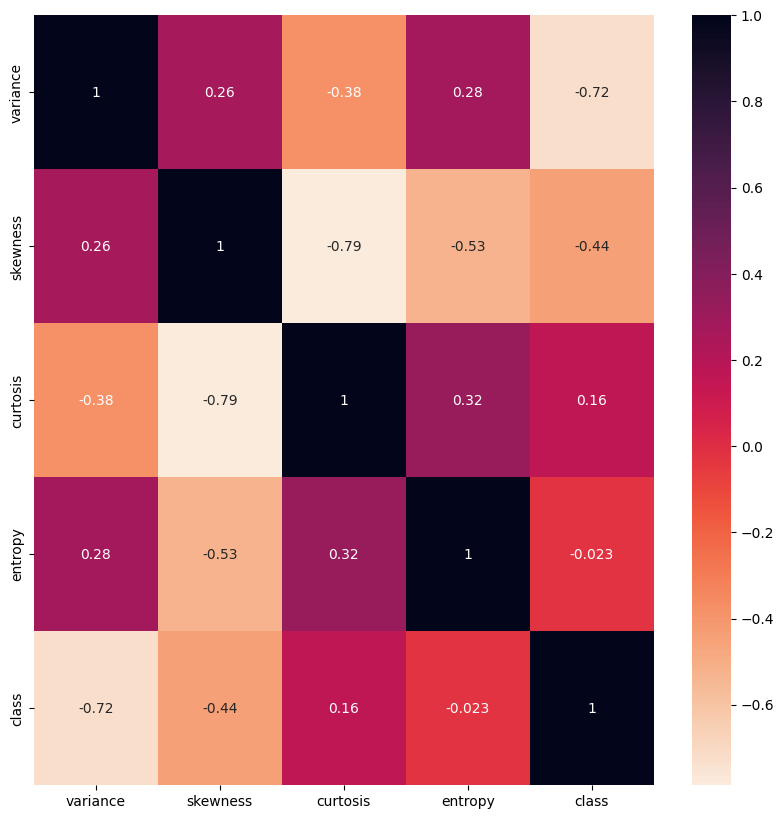

In [ ]:
#Analyzing relationship between variables
corrD= df.corr()
top_corr_features = corrD.index
plt.figure(figsize = (10,10))

h = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap=sns.color_palette("rocket_r", as_cmap=True))

This code is used to visualize the correlation matrix of a dataframe.
We can infer from this heatmap that strong correlations fall in the skewness and entrophy.

In [ ]:
X = df.drop ('class', axis=1)
y = df['class']

In the code above, we have splitted the data to X which has all the attributes except the class and y which has the class attribute.

###Splitting and Testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

Here we can observe on the first printed value the remaining 70% of the data and the 16 columns are present. While on the second output is the 30% that is allocated for testing.

###Create a model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.losses import BinaryCrossentropy
from keras.metrics import BinaryAccuracy

model = Sequential()
model.build(input_shape=(None, 784))  # Adjust the input shape according to your data
model.add(Dense(128, activation='sigmoid'))  # Hidden Layer
model.add(Dropout(0.25))
model.add(Dense(64, activation='sigmoid'))  # Hidden Layer
model.add(Dropout(0.20))
model.add(Dense(32, activation='sigmoid'))  # Hidden Layer
model.add(Dropout(0.20))
model.add(Dense(1, activation='sigmoid'))  # Output Layer


model.compile(loss=BinaryCrossentropy(), metrics=["accuracy", BinaryAccuracy()])  # Using binary_crossentropy measure the difference between predicted binary outcomes and actual binary labels
history = model.fit(X_train, y_train, epochs=25, batch_size=4)

Epoch 1/25
240/240 [==============================] - 1s 2ms/step - loss: 0.5561 - accuracy: 0.7219 - binary_accuracy: 0.7219
Epoch 2/25
240/240 [==============================] - 1s 2ms/step - loss: 0.1784 - accuracy: 0.9563 - binary_accuracy: 0.9563
Epoch 3/25
240/240 [==============================] - 1s 3ms/step - loss: 0.0790 - accuracy: 0.9740 - binary_accuracy: 0.9740
Epoch 4/25
240/240 [==============================] - 1s 3ms/step - loss: 0.0605 - accuracy: 0.9792 - binary_accuracy: 0.9792
Epoch 5/25
240/240 [==============================] - 1s 3ms/step - loss: 0.0682 - accuracy: 0.9771 - binary_accuracy: 0.9771
Epoch 6/25
240/240 [==============================] - 1s 2ms/step - loss: 0.0592 - accuracy: 0.9802 - binary_accuracy: 0.9802
Epoch 7/25
240/240 [==============================] - 0s 2ms/step - loss: 0.0519 - accuracy: 0.9792 - binary_accuracy: 0.9792
Epoch 8/25
240/240 [==============================] - 0s 2ms/step - loss: 0.0465 - accuracy: 0.9833 - binary_accuracy:

In the code above, we can see the implementation of the multilayer perceptron model. The sequential function creates a neural network model that stacks layers linearly. The build() allows us to adjust the input shape according to your data. and the model.add(Dense(value),activation = "sigmoid") adds a hidden layer with a specified values of neurons and the activation that is being used is a sigmoid function. The dropout function adds a dropout layer to the model which will droupout a specific percentage of units in order to prevent overfitting. The model.compile(loss=BinaryCrossentropy(), metrics=["accuracy", BinaryAccuracy()]) specifies the loss function as binary cross entropy, and metrics to monitor during training including accuracy and binary accuracy. Lastly is the history = model.fit(X_train, y_train, epochs=25, batch_size=4), it trains the model using the X_train and y_train data for 25 epochs with a 4 batch size. The training history is then stored in 'history' variable.



In [ ]:
score = model.evaluate(X_test, y_test)
print("ACCURACY : ", score)

13/13 [==============================] - 0s 2ms/step - loss: 0.0123 - accuracy: 0.9927 - binary_accuracy: 0.9927
ACCURACY :  [0.012316958047449589, 0.9927184581756592, 0.9927184581756592]


The code above computes the performance of the model on the given dataset.

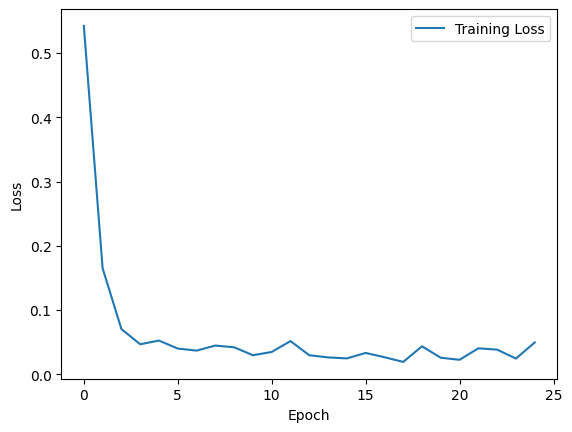

In [ ]:
import matplotlib.pyplot as plt
# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


The code above outputs the plot of the training loss as I proceed to train the data.

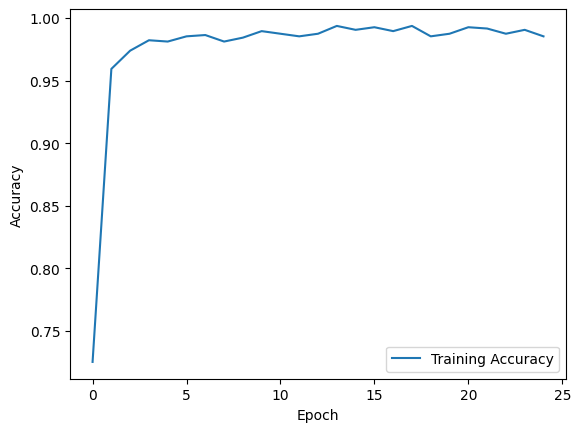

In [ ]:
# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


The code above outputs the Training accuracy as I continue to train the data. It shows a positive increase which might be a good indication.

In [ ]:
model = Sequential()
model.add(Dense(6, activation='sigmoid', input_shape=(784,)))  # Hidden Layer
model.add(Dense(23, activation='sigmoid'))  # Hidden Layer
model.add(Dense(8, activation='sigmoid'))  # Output Layer
model.add(Dense(3, activation='sigmoid'))  # Hidden Layer

model.build(input_shape=(None, 784))  # Adjust the input shape according to your data

# Now you can access the summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 6)                 4710      
                                                                 
 dense_5 (Dense)             (None, 23)                161       
                                                                 
 dense_6 (Dense)             (None, 8)                 192       
                                                                 
 dense_7 (Dense)             (None, 3)                 27        
                                                                 
Total params: 5090 (19.88 KB)
Trainable params: 5090 (19.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Lastly, this is the summary of the model architecture.

###Conclusion

In this laboratory activity, I have implemented multilayer perceptron model using keras library. I have learned how important the training dataset are, that is why they should take more units than the testing. Also adding multiple hidden layers such as dense and dropout layers helps in getting the appropriate loss functions and accuracy. I have observed that there is no stagnant values, and they are changing everytime. Through this hands on experience I get to familiarize more with the data training algorithms.